## Logistic Regression

In this notebook, we will be implementing a logistic regression model in order to complete binary classification tasks. 

Logistic regression, similar to the previous single neuron models we've explored, can be represented by the multiplication of the inputs $x_1, x_2, ..., x_m$ with their corresponding weights $w_1, w_2, ..., w_m$ plus the bias term $b$. The major difference lies in its activation function, the sigmoid. 

The sigmoid function is defined as:

$\qquad$ $\sigma (z) = \frac{1}{1 + e^{-z}}$

It maps any input $z$ to a value between 0 and 1, making it suitable for binary classification problems. It can be interpreted as the probability of being classified as the positive class (1) given the inputs.  

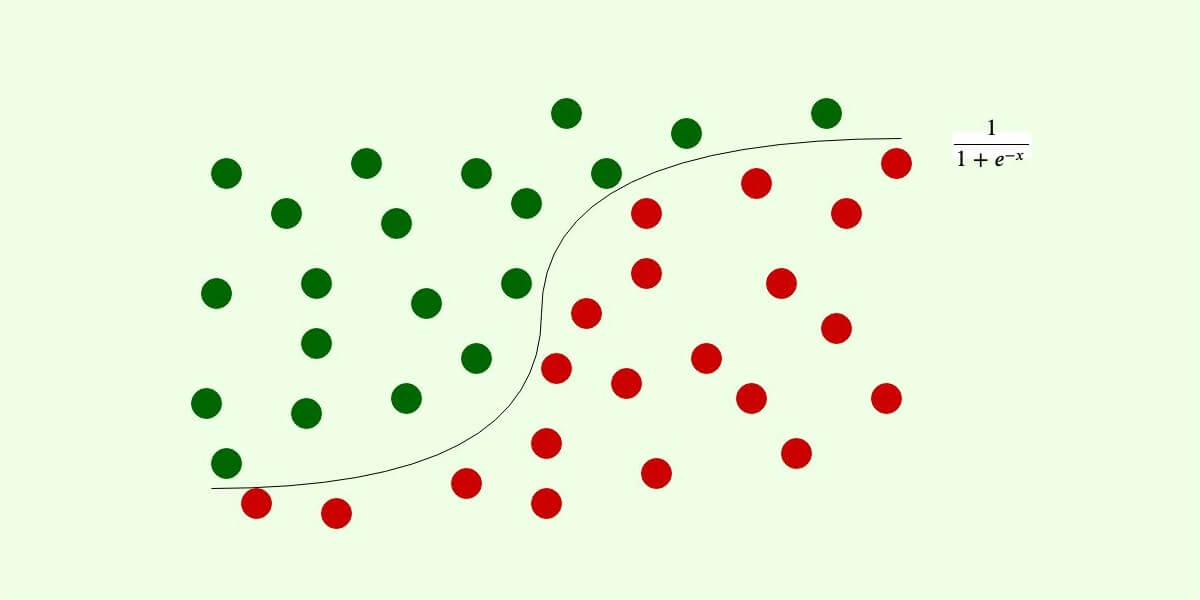

In terms of cost functions, a logistic regression model typically utilizes the binary cross entropy loss function, which is defined as:

$\qquad$ $ L(w,b) = \frac{1}{N} \sum_{i=1}^{N} \left[ -y_i \cdot \log(\hat{y}_i) - (1 - y_i) \cdot \log(1 - \hat{y}_i) \right] $

Like linear regression, we can use stochastic gradient descent to minimize our cost function during training. 

### Why use logistic regression?

For our previous perceptron model, we had to assume that our data was linearly separable. This becomes an issue when data is not linearly separable. However, the sigmoid function's smooth "S" shape and probabilistic output allows it to be effective with nonlinearly separable data. We will demonstrate this by applying the model on our dataset!

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

auto = pd.read_csv("/Users/kritinshanmugam/Downloads/auto-mpg.csv")
auto = auto[auto['horsepower'] != '?']
auto.dropna(inplace=True)
X = auto[['horsepower', 'weight']].astype('float64')
y = auto['mpg'].values

X = (X - X.mean()) / X.std()

X = X.values

y = np.where(auto['mpg'] < 23, 0, 1)

### Single Neuron Model as a Module

The logistic regression model uses essentially the same implementation of the single neuron model as linear regression. It's differences lie in the activation function and cost function. It is inefficient to repeat code more than two times. To increase our program's modularity, I implented our single neuron model as a module. We can simply import it into our notebook!

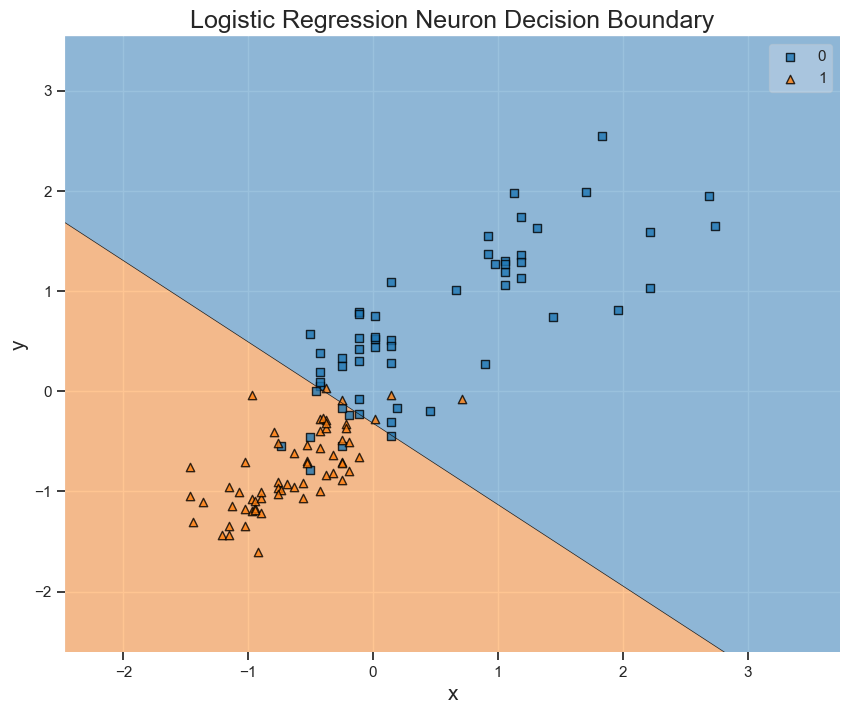

In [14]:
from SingleNeuron import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

neuron = SingleNeuron(sigmoid_activation, cross_entropy_loss)

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

neuron.train(x_train, y_train, alpha=0.0001, epochs=10000)

neuron.plot_decision_boundary(x_test, y_test)


Sick! Our logistic regression model's boundary is quite accurate. Almost all the 1-classified points are in the orange-shaded area, while the 0-classified points are mostly in the blue-shaded area. There will of course be some outliers, but the boundary is very accurate. We can plot our cost function against the epoch iterations to visualize how the cross entropy cost decreased over time. 

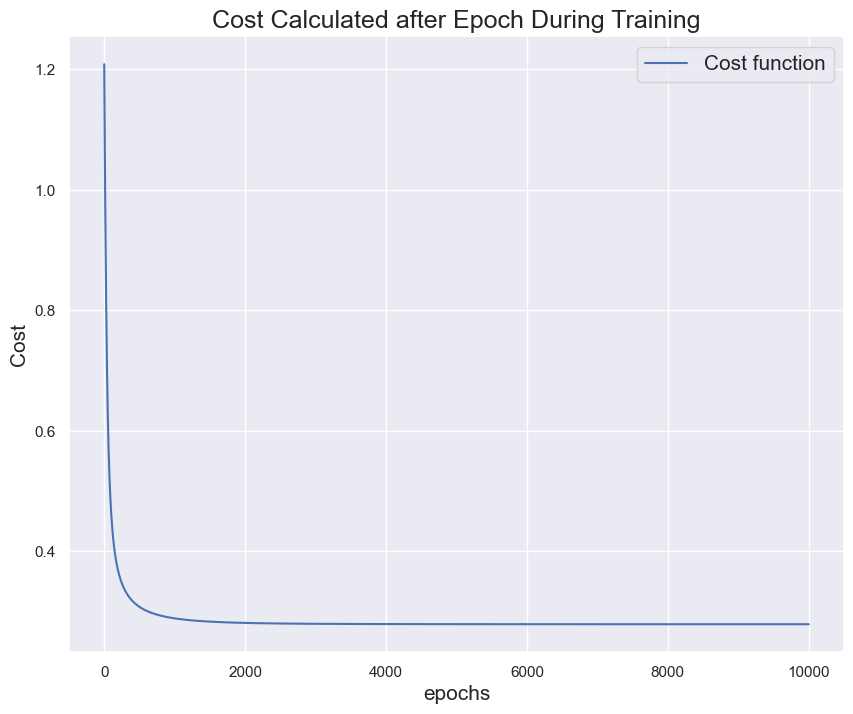

In [15]:
neuron.plot_cost_function()

As we can see, our cost function pretty much flattened after 2000 epochs itself. We could definitely lower our number of training epochs the next time we create an instance of our neuron model. 

## Conclusion

In this notebook, we were able to explain how Logistic Regression works and the benefits it provides over other binary classification models, like the Perceptron. The main benefit is that our data does not exactly need to be linearly separable. We also provided the Single Neuron Model as a module to increase our program's modularity. Lastly, we applied the model on our auto-mpg dataset and analyzed its results. 